✅ Model saved successfully


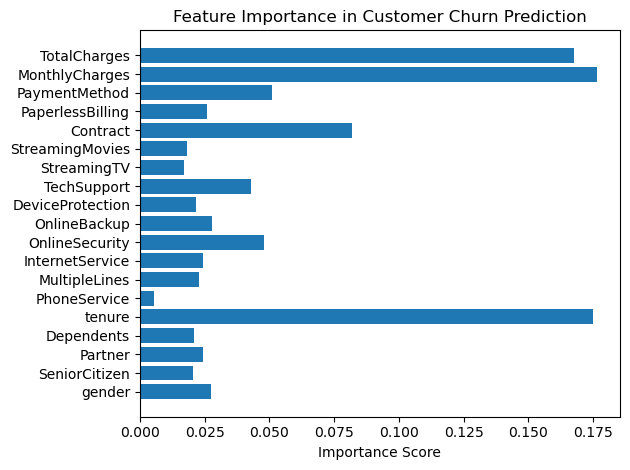

📊 feature_importance.png saved


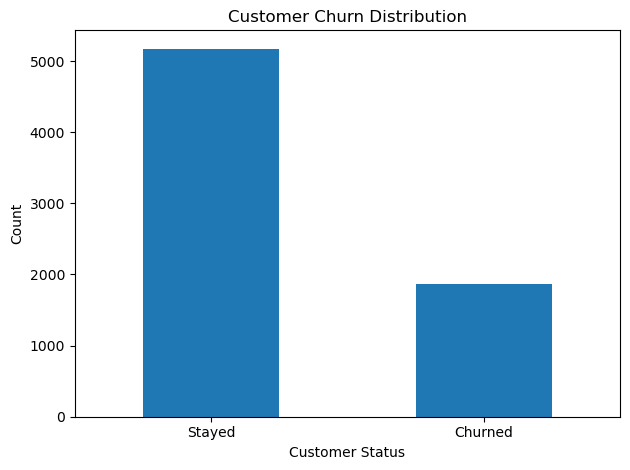

📊 churn_distribution.png saved


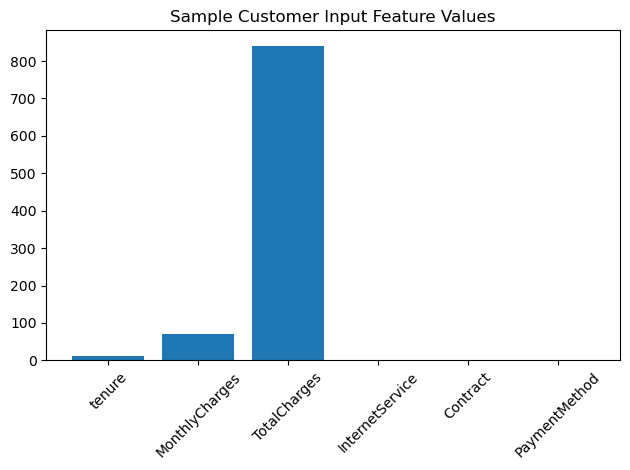

📊 input_graph.png saved
🎉 ALL GRAPHS GENERATED SUCCESSFULLY


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import os

# Load dataset
df = pd.read_csv("Customer-Churn.csv")

# Drop unnecessary column
df.drop("customerID", axis=1, inplace=True)


# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save model + feature names
feature_names = X.columns.tolist()
pickle.dump((model, feature_names), open("churn_model.pkl", "wb"))
print("✅ Model saved successfully")

# GRAPH 1: FEATURE IMPORTANCE
importances = model.feature_importances_
plt.figure()
plt.barh(feature_names, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance in Customer Churn Prediction")
plt.tight_layout()
plt.show()

print("📊 feature_importance.png saved")

# GRAPH 2: CHURN DISTRIBUTION
plt.figure()
y.value_counts().plot(kind="bar")
plt.xticks([0, 1], ["Stayed", "Churned"], rotation=0)
plt.xlabel("Customer Status")
plt.ylabel("Count")
plt.title("Customer Churn Distribution")
plt.tight_layout()
plt.show()

print("📊 churn_distribution.png saved")

# GRAPH 3: SAMPLE INPUT GRAPH (Optional)
sample_input = {
    "tenure": 12,
    "MonthlyCharges": 70,
    "TotalCharges": 840,
    "InternetService": 1,
    "Contract": 0,
    "PaymentMethod": 2
}

plt.figure()
plt.bar(sample_input.keys(), sample_input.values())
plt.xticks(rotation=45)
plt.title("Sample Customer Input Feature Values")
plt.tight_layout()
plt.show()
print("📊 input_graph.png saved")

print("🎉 ALL GRAPHS GENERATED SUCCESSFULLY")